<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/DataNLTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install netCDF4

     |████████████████████████████████| 4.7MB 5.2MB/s 
     |████████████████████████████████| 317kB 40.0MB/s 


In [2]:
from netCDF4 import Dataset
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [5]:
file = '/content/sample_data/tempStJohns.nc'

In [6]:
df = Dataset(file)

In [7]:
df

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-02-03 00:49:51 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data2/adaptor.mars.internal-1612306467.0641284-4955-27-685dbd6e-9572-4267-a9a7-5a61b7e919e4.nc /cache/tmp/685dbd6e-9572-4267-a9a7-5a61b7e919e4-adaptor.mars.internal-1612306467.0646257-4955-9-tmp.grib
    dimensions(sizes): longitude(1), latitude(1), expver(2), time(87672)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 t2m(time, expver, latitude, longitude)
    groups: 

In [9]:
df['longitude'][0]

masked_array(data=-52.75,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [10]:
df['latitude'][0]

masked_array(data=47.6,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [35]:
df['time'] #since 1900

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (87672,)
filling on, default _FillValue of -2147483647 used

In [36]:
df['time'][:]

masked_array(data=[ 973008,  973009,  973010, ..., 1060677, 1060678,
                   1060679],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [38]:
time = df['time'][:]-973008 #Time since 2011-01-01 00:00:00.0

In [39]:
 df['t2m'][:,0,0,0]

masked_array(data=[272.81080791804084, 272.6567134137989,
                   272.7837285490946, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-32767)

In [40]:
temp = df['t2m'][:,0,0,0]-273.15

In [41]:
temp = temp[~temp.mask] #use the inverse of the mask as an index.

In [42]:
temp.shape

(86928,)

In [43]:
time = time[:86928]

In [44]:
time.shape

(86928,)

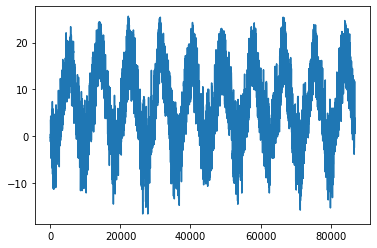

In [45]:
plt.plot(time,temp)

In [46]:
time = time/8760 

In [47]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

config= {'displaylogo': False}
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=temp,
                    mode='lines+markers',
                    name='Temp'))

fig.update_layout(title = 'Temperature 2011-2020',xaxis_title = 'Number of Years', yaxis_title = 'Celsius', yaxis_showgrid = False, xaxis_showgrid = False, plot_bgcolor = 'white')
fig.update_layout(hovermode="x")

fig.show(config= {'displaylogo': False})

In [48]:
fig.write_html("file.html", include_plotlyjs='cdn',config= dict({'scrollZoom': True, 'displayModeBar': False}) )